# <font color = "Cinze">   Índice <a name = "Voltar"></a>

   O que queremos responder? 
1. [Imponrtando e visualizando a base de dados](#1)
2. [Entendendo e tratando a base de dados](#2)
3. [Convertendo object  para data](#3)    
4. [Como foi a venda nesse periodo](#4)
5. [Customizando grafico de venda ano](#5)
6. [Customizando grafico de venda mes](#6)
7. [Qual foi a categoria mais vendida](#7)
8. [Qual o item mais vendido](#8)   
9. [Qual a venda do top 15 por ano](#9)   
10.[Top 15 Juntando com o Merge do pandas](#10)    
11.[Exportando](#11)

# <font color = "Green"> **1 Imponrtando e visualizando a base de dados** <a name = "1"></a>
    
[Voltar ao Indice](#Voltar)    

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
base = pd.read_csv(r"Criando uma apresentação executiva.csv")

base.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.798
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.368
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.188
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.376
9799,9800,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-AC-10000487,Technology,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,10.384


In [3]:
base.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [4]:
base.shape

(9800, 18)

In [5]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [6]:
base["Postal Code"].isna().sum()

11

In [7]:
base[base["Postal Code"].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [8]:
base[(base["City"]=="Burlington") & (base["State"]=="Vermont")]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


# <font color = "Green"> **2 Entendendo e tratando a base de dados** <a name = "2"></a>
    
[Voltar ao Indice](#Voltar)    

In [9]:
base.loc[base["Postal Code"].isnull(),"Postal Code"] = 5401

In [10]:
base[base["Postal Code"]==5401]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,5401.0,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,5401.0,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,5401.0,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,5401.0,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,5401.0,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,5401.0,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,5401.0,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,5401.0,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,5401.0,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,5401.0,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [11]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

# <font color = "Green"> **3 Convertendo object  para data** <a name = "3"></a>
    
[Voltar ao Indice](#Voltar)    

In [12]:
import datetime as dt

In [61]:
base["Ship Date"] = pd.to_datetime(base["Ship Date"],format="%d,%m,%y")

In [63]:
base["Order Date"] = pd.to_datetime(base["Order Date"],format="%d,%m,%y")

<AxesSubplot:xlabel='Order Date'>

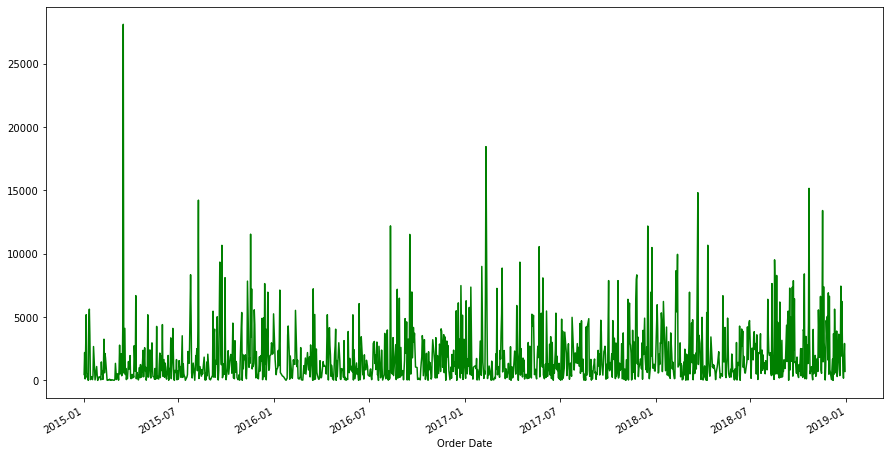

In [15]:
base.groupby(["Order Date"])["Sales"].sum().plot(figsize=[15,8],color="g")

In [16]:
base["Ano"] = base["Order Date"].dt.year
base["Mes"] = base["Order Date"].dt.month

# <font color = "Green"> **4 Como foi a venda nesse periodo** <a name = "4"></a>
    
[Voltar ao Indice](#Voltar)   

<AxesSubplot:xlabel='Ano'>

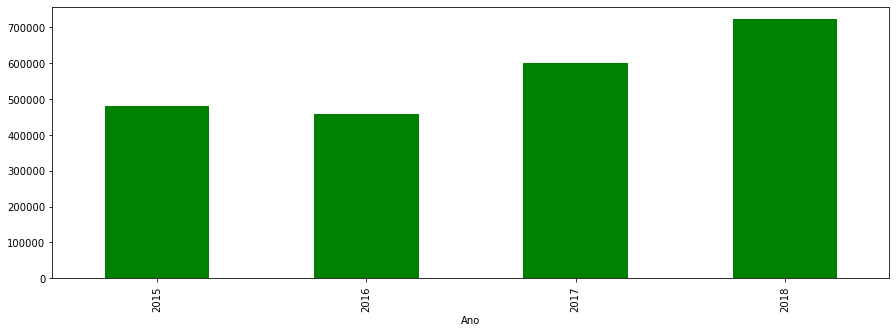

In [17]:
base.groupby(["Ano"])["Sales"].sum().plot.bar(figsize=[15,5],color="g")

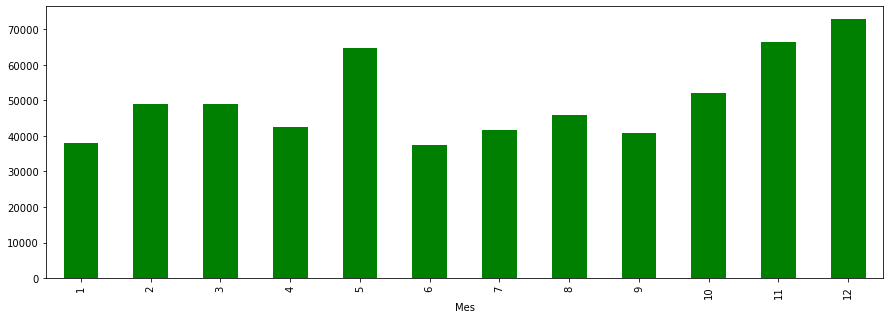

In [18]:
base[base["Ano"]==2017].groupby(["Mes"])["Sales"].sum().plot.bar(figsize=[15,5],color="g");

# <font color = "Green"> **5 Customizando grafico de venda ano** <a name = "5"></a>
    
[Voltar ao Indice](#Voltar)   

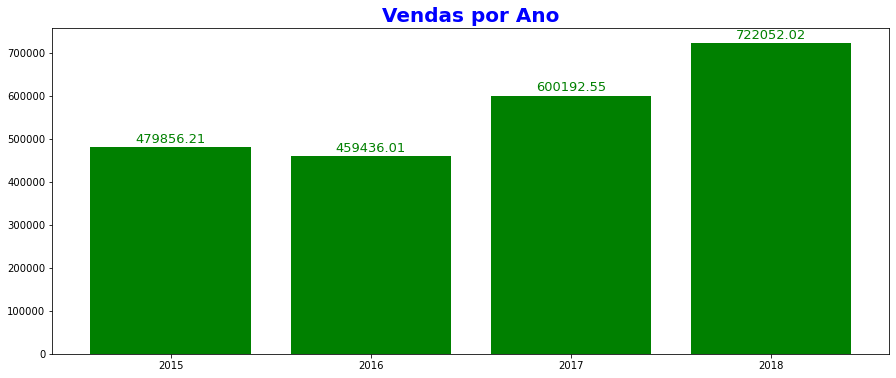

In [19]:
x = base.groupby(["Ano"])["Sales"].sum().index
y= base.groupby(["Ano"])["Sales"].sum().values
fig, ax = plt.subplots(figsize=[15,6])

ax.bar(x,y,color="g")
plt.title("Vendas por Ano",
          color="b",
          fontsize=20,
         fontweight="bold")
ax.xaxis.set_ticks([2015,2016,2017,2018])
for i in range(0,4):
    ax.annotate(round(y[i],2), # Irfomação que vai ficar no rotulo de dados
                (x[i],y[i]), # Colocar na posição correta
               ha="center",#Centralizar
                xytext=(0,5), # Esse junto com o de baixo para descolar da barra
               textcoords="offset points",
               fontsize=13,
               color="g")
#ax.legend()

plt.show()

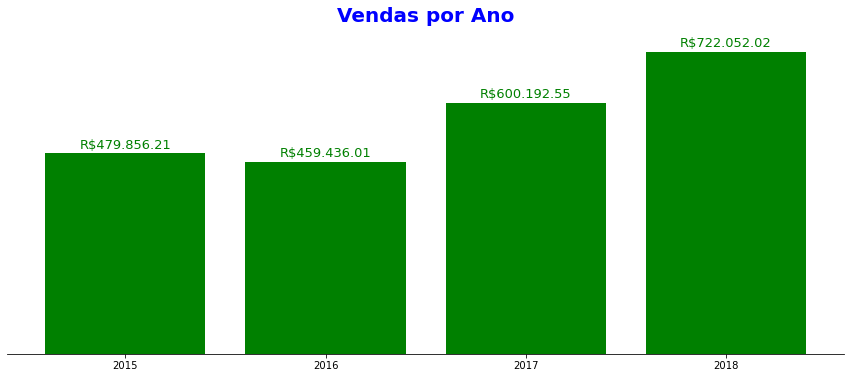

In [20]:
x = base.groupby(["Ano"])["Sales"].sum().index
y= base.groupby(["Ano"])["Sales"].sum().values
fig, ax = plt.subplots(figsize=[15,6])

ax.bar(x,y,color="g")
plt.title("Vendas por Ano",
          color="b",
          fontsize=20,
         fontweight="bold")
ax.xaxis.set_ticks([2015,2016,2017,2018])
for i in range(0,4):
    ax.annotate("R${:,.2f}".format(y[i]).replace(",","."), # Irfomação que vai ficar no rotulo de dados
                (x[i],y[i]), # Colocar na posição correta
               ha="center",#Centralizar
                xytext=(0,5), # Esse junto com o de baixo para descolar da barra
               textcoords="offset points",
               fontsize=13,
               color="g")
    
ax.set_yticks([0,780000]) # Ajusta o eixo y para para parar de cortar   
ax.yaxis.set_visible(False) # Tirar o eixo y da visualização
ax.spines["top"].set_visible(False) #Titando a linha de grade de cima
ax.spines["left"].set_visible(False) #Titando a linha de grade Direita
ax.spines["right"].set_visible(False)#Titando a linha de grade da esquerda
#ax.legend()

plt.show()

# <font color = "Green"> **6 Customizando grafico de venda mes** <a name = "6"></a>
    
[Voltar ao Indice](#Voltar)   

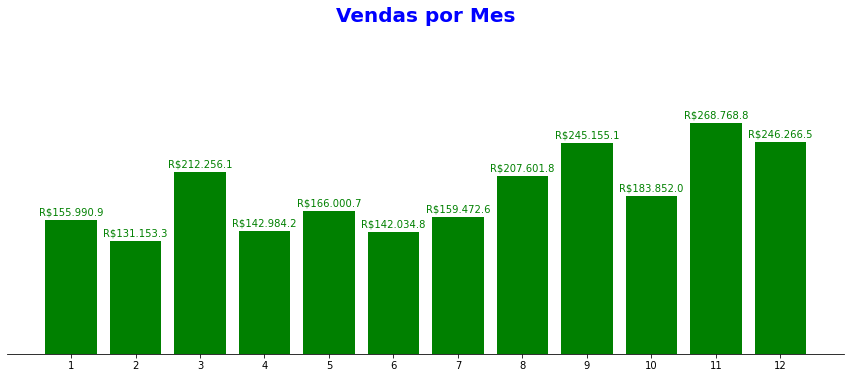

In [21]:
x = base.groupby(["Mes"])["Sales"].sum().index
y= base.groupby(["Mes"])["Sales"].sum().values
fig, ax = plt.subplots(figsize=[15,6])

ax.bar(x,y,color="g")
plt.title("Vendas por Mes",
          color="b",
          fontsize=20,
         fontweight="bold")
#ax.xaxis.set_ticks([2015,2016,2017,2018])
for i in range(0,12):
    ax.annotate("R${:,.1f}".format(y[i]).replace(",","."), # Irfomação que vai ficar no rotulo de dados
                (x[i],y[i]), # Colocar na posição correta
               ha="center",#Centralizar
                xytext=(0,5), # Esse junto com o de baixo para descolar da barra
               textcoords="offset points",
               fontsize=10,
               color="g")
    
ax.set_yticks([0,380000]) # Ajusta o eixo y para para parar de cortar   
ax.yaxis.set_visible(False) # Tirar o eixo y da visualização
ax.spines["top"].set_visible(False) #Titando a linha de grade de cima
ax.spines["left"].set_visible(False) #Titando a linha de grade Direita
ax.spines["right"].set_visible(False)#Titando a linha de grade da esquerda
ax.xaxis.set_ticks(np.arange(1,13)) # Colocar o nome do mes de 1 a 12
#ax.legend()

plt.show()

In [22]:
soma_mes = base.groupby(["Ano","Mes"])["Sales"].sum()

In [23]:
soma_mes.head(20)

Ano   Mes
2015  1      28828.2540
      2      12588.4840
      3      54027.6920
      4      24710.0160
      5      29520.4900
      6      29181.3346
      7      35194.5580
      8      37349.2655
      9      65956.3998
      10     34561.9470
      11     64369.4565
      12     63568.3107
2016  1      29347.3864
      2      20728.3520
      3      34489.6776
      4      38056.9685
      5      30761.5585
      6      28515.9082
      7      28573.3100
      8      49076.9300
Name: Sales, dtype: float64

- Resetando o indice do agrupamento e transformando a tabela em um DF

In [24]:
soma_mes = soma_mes.reset_index()

soma_mes.head(10)

,Ano,Mes,Sales
0,2015,1,28828.2540
1,2015,2,12588.4840
2,2015,3,54027.6920
3,2015,4,24710.0160
4,2015,5,29520.4900
5,2015,6,29181.3346
6,2015,7,35194.5580
7,2015,8,37349.2655
8,2015,9,65956.3998
9,2015,10,34561.9470


In [25]:
soma_mes[soma_mes["Ano"]==2016]

,Ano,Mes,Sales
12,2016,1,29347.3864
13,2016,2,20728.3520
14,2016,3,34489.6776
15,2016,4,38056.9685
16,2016,5,30761.5585
17,2016,6,28515.9082
18,2016,7,28573.3100
19,2016,8,49076.9300
20,2016,9,65352.9970
21,2016,10,31631.8890


In [26]:
x = soma_mes[soma_mes["Ano"]==2015].Mes.values
y = soma_mes[soma_mes["Ano"]==2015].Sales.values
x1 = soma_mes[soma_mes["Ano"]==2016].Mes.values
y1 = soma_mes[soma_mes["Ano"]==2016].Sales.values
x3 = soma_mes[soma_mes["Ano"]==2018].Mes.values
y3 = soma_mes[soma_mes["Ano"]==2018].Sales.values

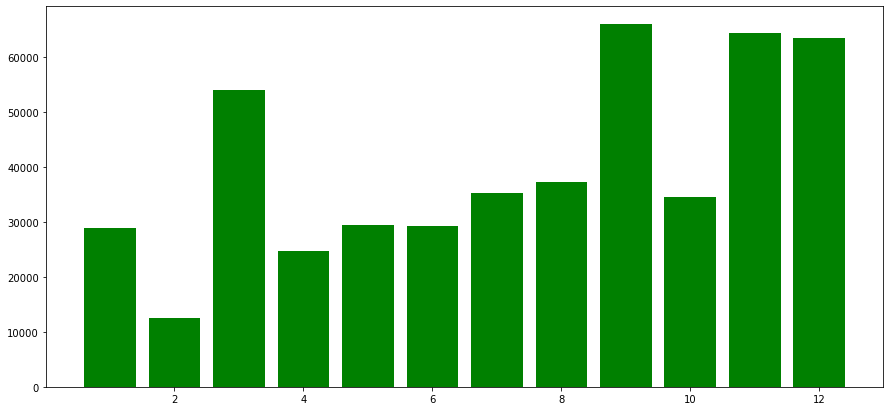

In [27]:
fig, ax = plt.subplots(figsize=[15,7])

ax.bar(x,y,color="g")

plt.show()

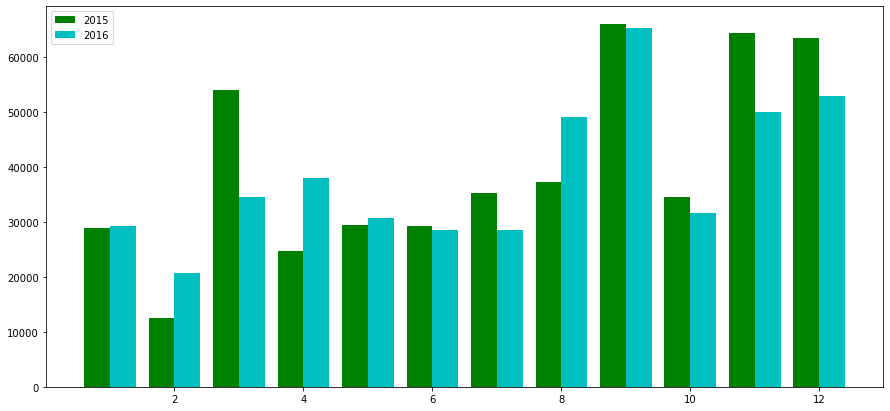

In [28]:
fig, ax = plt.subplots(figsize=[15,7])

wid = 0.4

ax.bar(x-wid/2 # Deslocar a colunas coloca -
       ,y,color="g",
      width=wid # Afina a largura das colunas
       ,label=2015
      )
ax.bar(x1+wid/2 # Deslocar a colunas coloca -
       ,y1,color="c",
      width=wid # Afina a largura das colunas
       ,label=2016
      )

ax.legend()

plt.show()

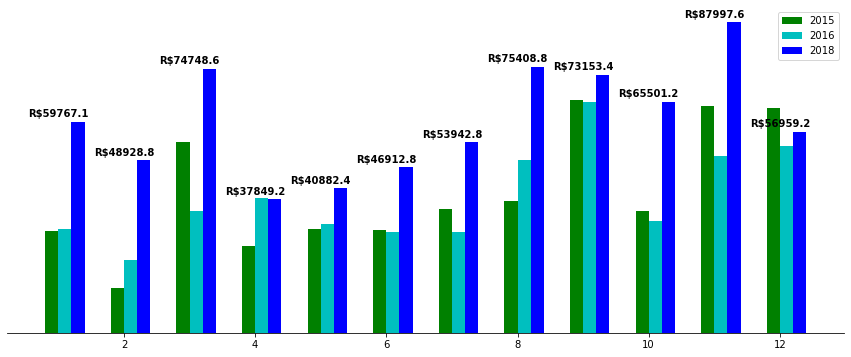

In [29]:
fig, ax = plt.subplots(figsize=[15,6])

wid = 0.2

ax.bar(x-wid/2 # Deslocar a colunas coloca -
       ,y,color="g",
      width=wid # Afina a largura das colunas
       ,label=2015
      )
ax.bar(x1+wid/2 # Deslocar a colunas coloca -
       ,y1,color="c",
      width=wid # Afina a largura das colunas
       ,label=2016
      )
ax.bar(x3+wid+wid/2 # Deslocar a colunas coloca -
       ,y3,color="b",
      width=wid # Afina a largura das colunas
       ,label=2018
      )

ax.legend()
for i in range(0,12):
    ax.annotate("R${:,.1f}".format(y3[i]).replace(",",""),
               (x3[i],y3[i]),
                ha="center",
                xytext=(0,5),
                textcoords="offset points",
                fontsize=10,
                color="black",
                fontweight="bold"
               )
    
#ax.set_yticks([0,380000]) # Ajusta o eixo y para para parar de cortar   
ax.yaxis.set_visible(False) # Tirar o eixo y da visualização    
ax.spines["top"].set_visible(False) #Titando a linha de grade de cima
ax.spines["left"].set_visible(False) #Titando a linha de grade Direita
ax.spines["right"].set_visible(False)#Titando a linha de grade da esquerda    

plt.show()


#"R${:,.1f}".format(y[i]).replace(",","."), # Irfomação que vai ficar no rotulo de dados
#               (x[i],y[i]), # Colocar na posição correta
#               ha="center",#Centralizar
#                xytext=(0,5), # Esse junto com o de baixo para descolar da barra
#               textcoords="offset points",
#               fontsize=10,
#               color="g")

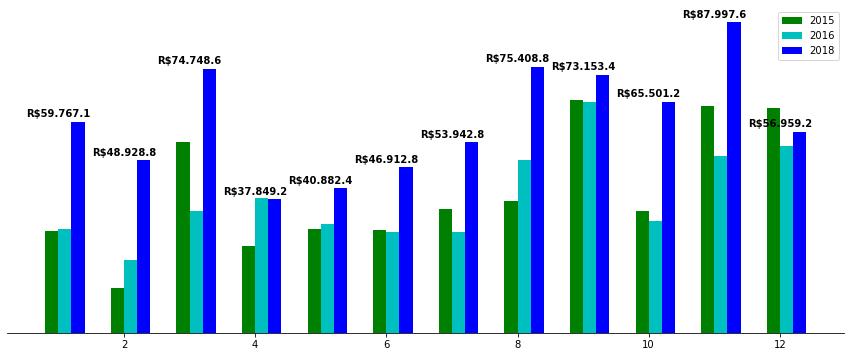

In [30]:
fig, ax = plt.subplots(figsize=[15,6])

wid = 0.2

ax.bar(x-wid/2 # Deslocar a colunas coloca -
       ,y,color="g",
      width=wid # Afina a largura das colunas
       ,label=2015
      )
ax.bar(x1+wid/2 # Deslocar a colunas coloca -
       ,y1,color="c",
      width=wid # Afina a largura das colunas
       ,label=2016
      )
ax.bar(x3+wid+wid/2 # Deslocar a colunas coloca -
       ,y3,color="b",
      width=wid # Afina a largura das colunas
       ,label=2018
      )

ax.legend()
for i in range(0,12):
    ax.annotate("R${:,.1f}".format(y3[i]).replace(",","."),
               (x3[i],y3[i]),
                ha="center",
                xytext=(0,5),
                textcoords="offset points",
                fontsize=10,
                color="black",
                fontweight="bold"
               )
    
#ax.set_yticks([0,380000]) # Ajusta o eixo y para para parar de cortar   
ax.yaxis.set_visible(False) # Tirar o eixo y da visualização    
ax.spines["top"].set_visible(False) #Titando a linha de grade de cima
ax.spines["left"].set_visible(False) #Titando a linha de grade Direita
ax.spines["right"].set_visible(False)#Titando a linha de grade da esquerda    

plt.show()


#"R${:,.1f}".format(y[i]).replace(",","."), # Irfomação que vai ficar no rotulo de dados
#               (x[i],y[i]), # Colocar na posição correta
#               ha="center",#Centralizar
#                xytext=(0,5), # Esse junto com o de baixo para descolar da barra
#               textcoords="offset points",
#               fontsize=10,
#               color="g")

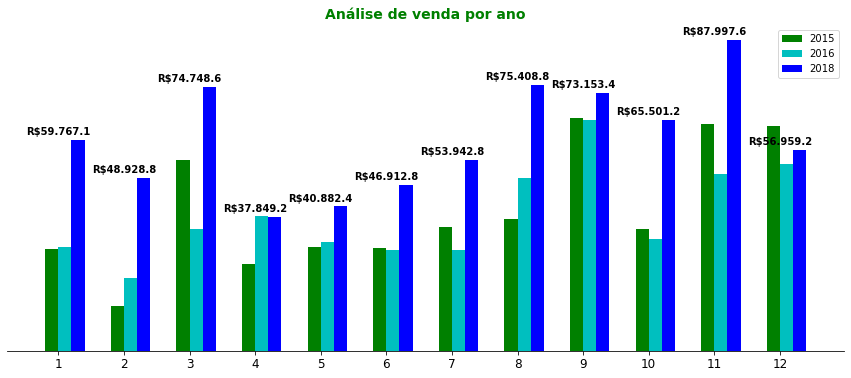

In [31]:
fig, ax = plt.subplots(figsize=[15,6])

wid = 0.2

ax.bar(x-wid/2 # Deslocar a colunas coloca -
       ,y,color="g",
      width=wid # Afina a largura das colunas
       ,label=2015
      )
ax.bar(x1+wid/2 # Deslocar a colunas coloca -
       ,y1,color="c",
      width=wid # Afina a largura das colunas
       ,label=2016
      )
ax.bar(x3+wid+wid/2 # Deslocar a colunas coloca -
       ,y3,color="b",
      width=wid # Afina a largura das colunas
       ,label=2018
      )

ax.legend()
for i in range(0,12):
    ax.annotate("R${:,.1f}".format(y3[i]).replace(",","."),
               (x3[i],y3[i]),
                ha="center",
                xytext=(0,5),
                textcoords="offset points",
                fontsize=10,
                color="black",
                fontweight="bold"
               )
    
#ax.set_yticks([0,380000]) # Ajusta o eixo y para para parar de cortar   
ax.yaxis.set_visible(False) # Tirar o eixo y da visualização    
ax.spines["top"].set_visible(False) #Titando a linha de grade de cima
ax.spines["left"].set_visible(False) #Titando a linha de grade Direita
ax.spines["right"].set_visible(False)#Titando a linha de grade da esquerda   
plt.title("Análise de venda por ano",fontsize=14,fontweight="bold",color="g")
ax.xaxis.set_ticks(np.arange(1,13))
#ax.set_xticklabels()
ax.tick_params(axis="x",labelsize=12) # Melhorando o visual do eixo  x

plt.show()

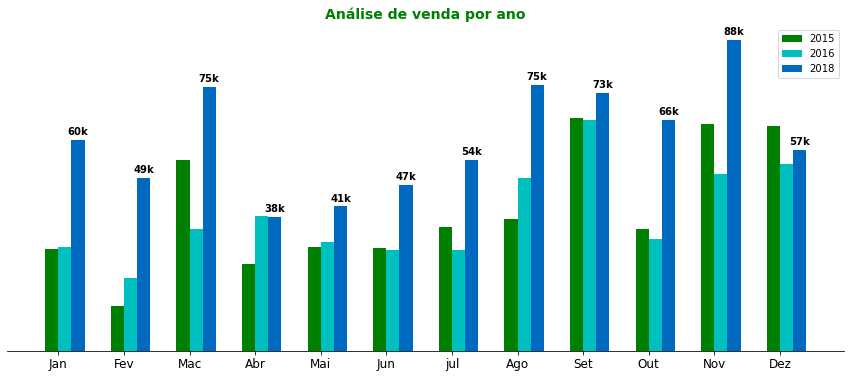

In [32]:
fig, ax = plt.subplots(figsize=[15,6])

wid = 0.2

ax.bar(x-wid/2 # Deslocar a colunas coloca -
       ,y,color="g",
      width=wid # Afina a largura das colunas
       ,label=2015
      )
ax.bar(x1+wid/2 # Deslocar a colunas coloca -
       ,y1,color="c",
      width=wid # Afina a largura das colunas
       ,label=2016
      )
ax.bar(x3+wid+wid/2 # Deslocar a colunas coloca -
       ,y3,color="#0069c0",
      width=wid # Afina a largura das colunas
       ,label=2018
      )

ax.legend()
for i in range(0,12):
    ax.annotate("{:,.0f}k".format(y3[i]/1000),
               (x3[i]+wid+wid/2,y3[i]),
                ha="center",
                xytext=(0,5),
                textcoords="offset points",
                fontsize=10,
                color="black",
                fontweight="bold"
               )
    
#ax.set_yticks([0,380000]) # Ajusta o eixo y para para parar de cortar   
ax.yaxis.set_visible(False) # Tirar o eixo y da visualização    
ax.spines["top"].set_visible(False) #Titando a linha de grade de cima
ax.spines["left"].set_visible(False) #Titando a linha de grade Direita
ax.spines["right"].set_visible(False)#Titando a linha de grade da esquerda   
plt.title("Análise de venda por ano",fontsize=14,fontweight="bold",color="g")
ax.xaxis.set_ticks(np.arange(1,13))
ax.set_xticklabels(["Jan","Fev","Mac","Abr","Mai","Jun","jul","Ago","Set","Out","Nov","Dez"])# Colocando os meses
ax.tick_params(axis="x",labelsize=12) # Melhorando o visual do eixo  x

plt.show()

# <font color = "Green"> **7 Qual foi a categoria mais vendida** <a name = "7"></a>
    
[Voltar ao Indice](#Voltar)    

<AxesSubplot:xlabel='Category'>

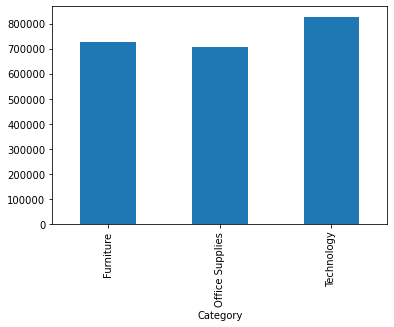

In [33]:
base.groupby(["Category"])["Sales"].sum().plot.bar()

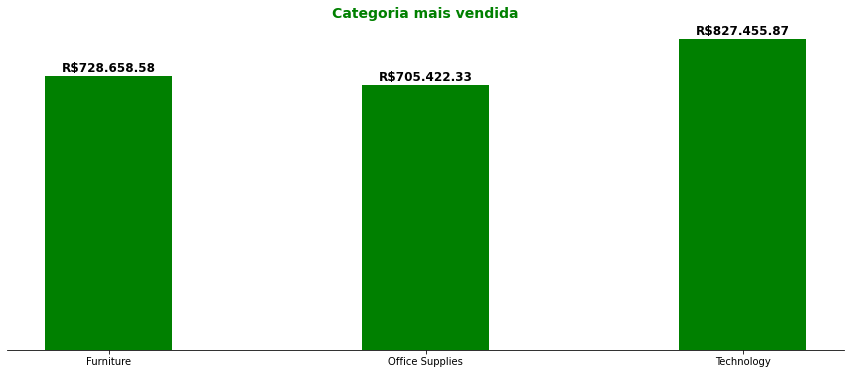

In [34]:
x4= base.groupby(["Category"])[["Sales"]].sum().index
y4= base.groupby(["Category"])["Sales"].sum().values

fig, ax = plt.subplots(figsize=[15,6])

wid = 0.4

ax.bar(x4
       ,y4,color="g",
      width=wid # Afina a largura das colunas    
      )
#ax.legend()
for i in range(0,3):
    ax.annotate("R${:,.2f}".format(y4[i]).replace(",","."),
               (x4[i],y4[i]),
                ha="center",
                xytext=(0,5),
                textcoords="offset points",
                fontsize=12,
                color="black",
                fontweight="bold"
               )
    

#plt.legend()

#ax.set_yticks([0,380000]) # Ajusta o eixo y para para parar de cortar   
ax.yaxis.set_visible(False) # Tirar o eixo y da visualização    
ax.spines["top"].set_visible(False) #Titando a linha de grade de cima
ax.spines["left"].set_visible(False) #Titando a linha de grade Direita
ax.spines["right"].set_visible(False)#Titando a linha de grade da esquerda   
plt.title("Categoria mais vendida",fontsize=14,fontweight="bold",color="g")
plt.show()

In [35]:
ano= base.groupby(["Category","Ano"])[["Sales"]].sum()
ano = ano.reset_index()
ano

,Category,Ano,Sales
0,Furniture,2015,156477.8811
1,Furniture,2016,164053.8674
2,Furniture,2017,195813.0400
3,Furniture,2018,212313.7872
4,Office Supplies,2015,149512.8200
5,Office Supplies,2016,133124.4070
6,Office Supplies,2017,182417.5660
7,Office Supplies,2018,240367.5410
8,Technology,2015,173865.5070
9,Technology,2016,162257.7310


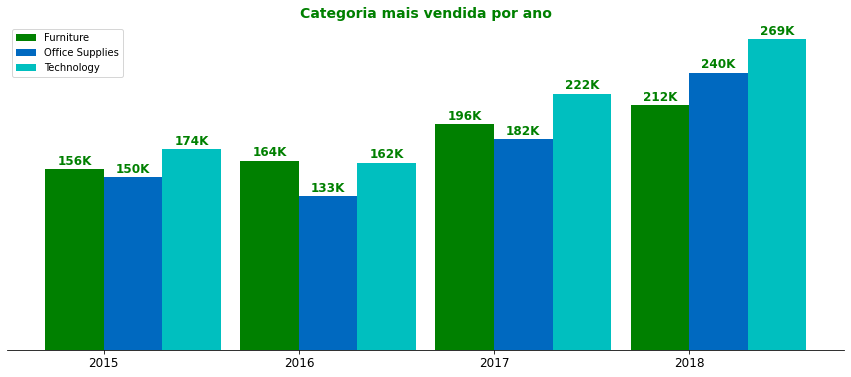

In [37]:
x5 = ano[ano["Category"]=="Furniture"]["Ano"].values
y5 = ano[ano["Category"]=="Furniture"]["Sales"].values
x6 = ano[ano["Category"]=="Office Supplies"]["Ano"].values
y6 = ano[ano["Category"]=="Office Supplies"]["Sales"].values
x7 = ano[ano["Category"]=="Technology"]["Ano"].values
y7 = ano[ano["Category"]=="Technology"]["Sales"].values



fig, ax = plt.subplots(figsize=[15,6])

wid = 0.3

ax.bar(x5-wid/2
       ,y5,color="g",
      width=wid # Afina a largura das colunas 
       ,label="Furniture"
      )
ax.bar(x6+wid/2
       ,y6,color="#0069c0",
      width=wid # Afina a largura das colunas
       ,label="Office Supplies"
      )
ax.bar(x7+wid+wid/2
       ,y7,color="c",
      width=wid # Afina a largura das colunas   
       ,label="Technology"
      )

for i in range(0,4):
    ax.annotate("{:,.0f}K".format(y5[i]/1000).replace(",","."),
               (x5[i]-wid/2,y5[i]),
                ha="center",
                xytext=(0,5),
                textcoords="offset points",
                fontsize=12,
                color="g",
                fontweight="bold"
               )
for i in range(0,4):
    ax.annotate("{:,.0f}K".format(y6[i]/1000).replace(",","."),
               (x6[i]+wid/2,y6[i]),
                ha="center",
                xytext=(0,5),
                textcoords="offset points",
                fontsize=12,
                color="g",
                fontweight="bold"
               )
for i in range(0,4):
    ax.annotate("{:,.0f}K".format(y7[i]/1000).replace(",","."),
               (x7[i]+wid+wid/2,y7[i]),
                ha="center",
                xytext=(0,5),
                textcoords="offset points",
                fontsize=12,
                color="g",
                fontweight="bold"
               )
    
#ax.set_yticks([0,380000]) # Ajusta o eixo y para para parar de cortar   
ax.yaxis.set_visible(False) # Tirar o eixo y da visualização    
ax.spines["top"].set_visible(False) #Titando a linha de grade de cima
ax.spines["left"].set_visible(False) #Titando a linha de grade Direita
ax.spines["right"].set_visible(False)#Titando a linha de grade da esquerda   
plt.title("Categoria mais vendida por ano",fontsize=14,fontweight="bold",color="g")    

plt.legend()

ax.xaxis.set_ticks([2015,2016,2017,2018])# Colocando os meses
ax.tick_params(axis="x",labelsize=12) # Melhorando o visual do eixo  x

plt.show()

# <font color = "Green"> **8 Qual o item mais vendido** <a name = "8"></a>
    
[Voltar ao Indice](#Voltar)    

In [38]:
prodmaisvendido = base.groupby(["Product ID"])["Sales"].sum()

prodmaisvendido = prodmaisvendido.reset_index()
prodmaisvendido = prodmaisvendido.sort_values("Sales",ascending=False)

prodmaisvendido.head()

,Product ID,Sales
1613,TEC-CO-10004722,61599.824
776,OFF-BI-10003527,27453.384
1641,TEC-MA-10002412,22638.480
80,FUR-CH-10002024,21870.576
691,OFF-BI-10001359,19823.479


In [39]:
n=15
toptens = prodmaisvendido.head(n)

toptens

,Product ID,Sales
1613,TEC-CO-10004722,61599.8240
776,OFF-BI-10003527,27453.3840
1641,TEC-MA-10002412,22638.4800
80,FUR-CH-10002024,21870.5760
691,OFF-BI-10001359,19823.4790
657,OFF-BI-10000545,19024.5000
1603,TEC-CO-10001449,18839.6860
1630,TEC-MA-10001127,18374.8950
845,OFF-BI-10004995,17965.0680
1419,OFF-SU-10000151,17030.3120


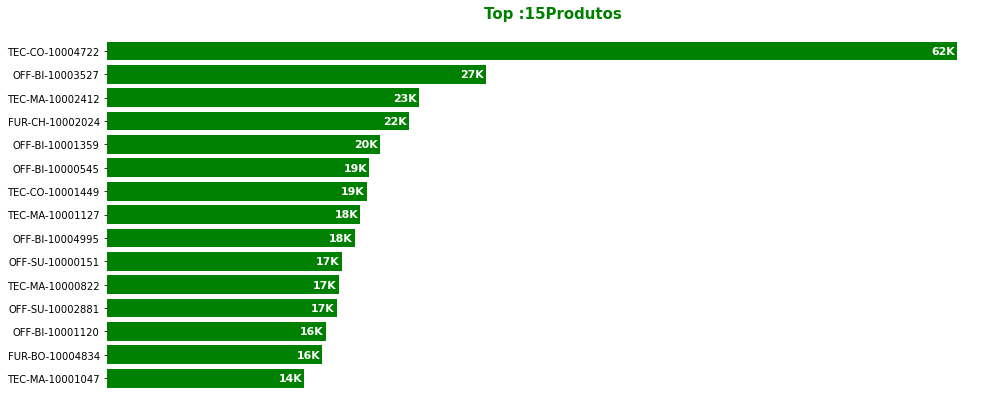

In [40]:
x10 = toptens["Sales"].values
y10 = toptens["Product ID"].values

fig, ax = plt.subplots(figsize=[16,7])


ax.barh(y10 # No grafico horizontal primeiro y ou seja a categorias
        ,x10 # depois x os valores
       ,color="g"
       ,align="center" # Alinhamento
       )
ax.invert_yaxis() # Para inverter o eixo y das maiores para as menores
plt.title("Top :"+str(n)+"Produtos",fontsize=15, color="g",fontweight="bold")

for i in range(0,n):
    ax.annotate("{:,.0f}K".format(x10[i]/1000), # Valor de x
               (x10[i],y10[i]), # Valor x e depois y
                ha="center",
                xytext=(-14,-3), # Mover a posição do valor
                textcoords="offset points",
                fontsize=11,
                color="w",
                fontweight="bold"
               )

ax.spines["top"].set_visible(False) #Titando a linha de grade de cima
ax.spines["left"].set_visible(False) #Titando a linha de grade Direita
ax.spines["right"].set_visible(False)#Titando a linha de grade da esquerda  
ax.spines["bottom"].set_visible(False) # Tirando a borda de baixo
ax.xaxis.set_visible(False) # Tirar o eixo x da visualização  

plt.show()

# <font color = "Green"> **9 Qual a venda do top 15 por ano** <a name = "9"></a>
    
[Voltar ao Indice](#Voltar)    

In [41]:
top15ano = base.groupby(["Product Name","Ano"])["Sales"].sum()
top15ano = top15ano.reset_index()
top15ano = top15ano.sort_values("Sales",ascending=False)
top = 15
top15ano[top15ano["Ano"]==2018].head(top)

,Product Name,Ano,Sales
1164,Canon imageCLASS 2200 Advanced Copier,2018,35699.898
3000,Martin Yale Chadless Opener Electric Letter Op...,2018,11825.902
1968,GBC DocuBind TL300 Electric Binding System,2018,10943.278
2342,Hewlett Packard LaserJet 3310 Copier,2018,9239.846
3977,Samsung Galaxy Mega 6.3,2018,9239.780
1367,Cubify CubeX 3D Printer Triple Head Print,2018,7999.980
1857,Fellowes PB500 Electric Punch Plastic Comb Bin...,2018,7371.742
2288,HON 5400 Series Task Chairs for Big and Tall,2018,7220.094
1957,GBC DocuBind P400 Electric Binding System,2018,7077.148
2838,Lexmark MX611dhe Monochrome Laser Printer,2018,5609.967


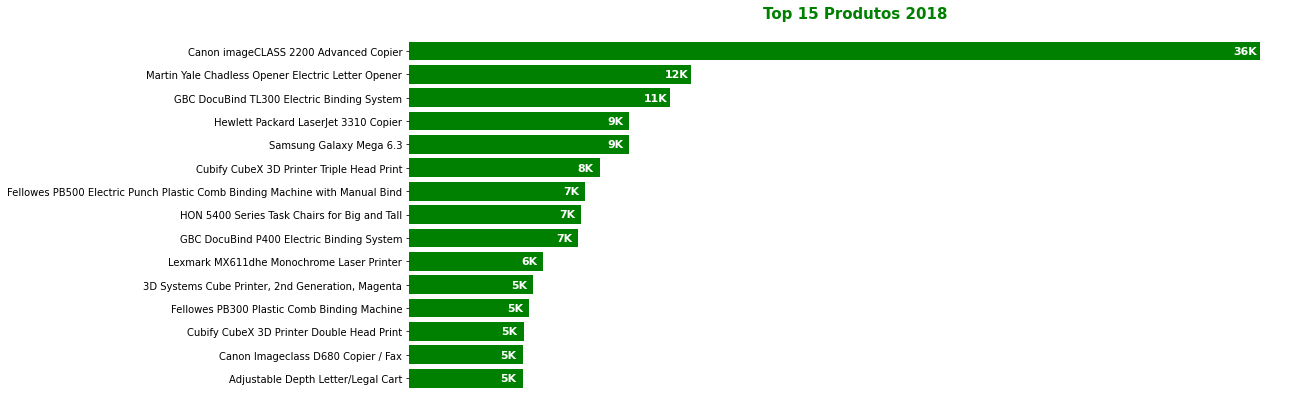

In [42]:
ano2018 = top15ano[top15ano["Ano"]==2018].head(top)
x11 = ano2018["Sales"].values
y11 = ano2018["Product Name"].values

fig, ax = plt.subplots(figsize=[16,7])


ax.barh(y11 # No grafico horizontal primeiro y ou seja a categorias
        ,x11 # depois x os valores
       ,color="g"
       ,align="center" # Alinhamento
       )
ax.invert_yaxis() # Para inverter o eixo y das maiores para as menores
plt.title("Top "+str(n)+" Produtos"+" "+"2018",fontsize=15, color="g",fontweight="bold")

for i in range(0,n):
    ax.annotate("{:,.0f}K".format(x11[i]/1000), # Valor de x
               (x11[i],y11[i]), # Valor x e depois y
                ha="center",
                xytext=(-14,-3), # Mover a posição do valor
                textcoords="offset points",
                fontsize=11,
                color="w",
                fontweight="bold"
               )

ax.spines["top"].set_visible(False) #Titando a linha de grade de cima
ax.spines["left"].set_visible(False) #Titando a linha de grade Direita
ax.spines["right"].set_visible(False)#Titando a linha de grade da esquerda  
ax.spines["bottom"].set_visible(False) # Tirando a borda de baixo
ax.xaxis.set_visible(False) # Tirar o eixo x da visualização  

plt.show()

# <font color = "Green"> **10 Top 15 Juntando com o Merge do pandas** <a name = "10"></a>
    
[Voltar ao Indice](#Voltar)    

In [46]:
baseanos = base.groupby(["Product Name","Ano"])["Sales"].sum()
baseanos = baseanos.reset_index()
baseanos = baseanos.sort_values("Sales",ascending=False)
topn = 15

baseanos.head(topn)

,Product Name,Ano,Sales
1164,Canon imageCLASS 2200 Advanced Copier,2018,35699.898
1163,Canon imageCLASS 2200 Advanced Copier,2017,25899.926
1270,Cisco TelePresence System EX90 Videoconferenci...,2015,22638.480
1855,Fellowes PB500 Electric Punch Plastic Comb Bin...,2016,15760.276
1974,GBC Ibimaster 500 Manual ProClick Binding System,2017,12860.562
3000,Martin Yale Chadless Opener Electric Letter Op...,2018,11825.902
3858,"Riverside Palais Royal Lawyers Bookcase, Royal...",2016,11717.034
2837,Lexmark MX611dhe Monochrome Laser Printer,2015,11219.934
1968,GBC DocuBind TL300 Electric Binding System,2018,10943.278
2289,HP Designjet T520 Inkjet Large Format Printer ...,2015,9624.945


In [54]:
baseanos[baseanos["Product Name"]==baseanos.head(topn).iloc[2,0]]

,Product Name,Ano,Sales
1270,Cisco TelePresence System EX90 Videoconferenci...,2015,22638.48


In [43]:
base.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Ano,Mes
9795,9796,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.798,2017,5
9796,9797,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.368,2016,12
9797,9798,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.188,2016,12
9798,9799,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.376,2016,12
9799,9800,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-AC-10000487,Technology,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,10.384,2016,12


# <font color = "Green"> **11 Exportando** <a name = "11"></a>
    
[Voltar ao Indice](#Voltar)    

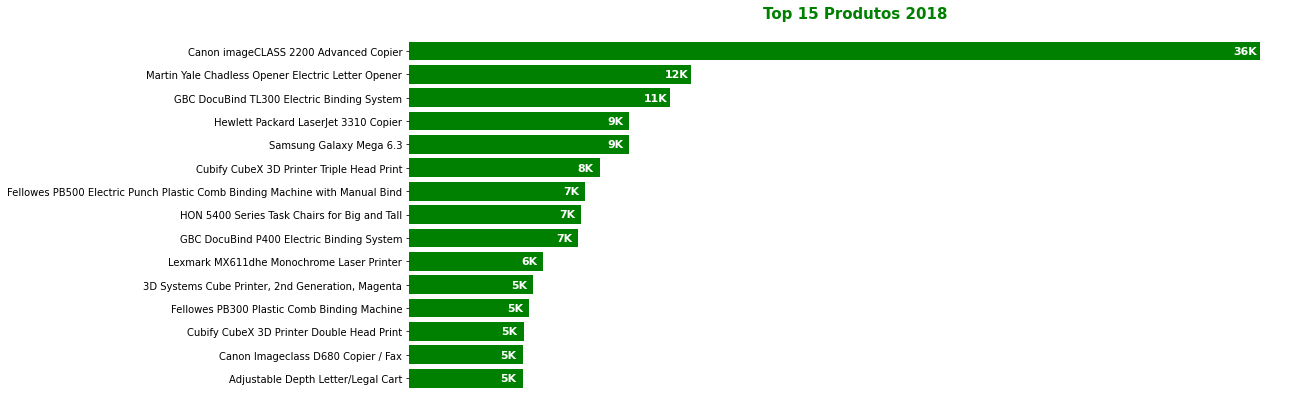

In [59]:
ano2018 = top15ano[top15ano["Ano"]==2018].head(top)
x11 = ano2018["Sales"].values
y11 = ano2018["Product Name"].values

fig, ax = plt.subplots(figsize=[16,7])


ax.barh(y11 # No grafico horizontal primeiro y ou seja a categorias
        ,x11 # depois x os valores
       ,color="g"
       ,align="center" # Alinhamento
       )
ax.invert_yaxis() # Para inverter o eixo y das maiores para as menores
plt.title("Top "+str(n)+" Produtos"+" "+"2018",fontsize=15, color="g",fontweight="bold")

for i in range(0,n):
    ax.annotate("{:,.0f}K".format(x11[i]/1000), # Valor de x
               (x11[i],y11[i]), # Valor x e depois y
                ha="center",
                xytext=(-14,-3), # Mover a posição do valor
                textcoords="offset points",
                fontsize=11,
                color="w",
                fontweight="bold"
               )

ax.spines["top"].set_visible(False) #Titando a linha de grade de cima
ax.spines["left"].set_visible(False) #Titando a linha de grade Direita
ax.spines["right"].set_visible(False)#Titando a linha de grade da esquerda  
ax.spines["bottom"].set_visible(False) # Tirando a borda de baixo
ax.xaxis.set_visible(False) # Tirar o eixo x da visualização  

plt.savefig("Venda_2018_itens2",transparent=True)

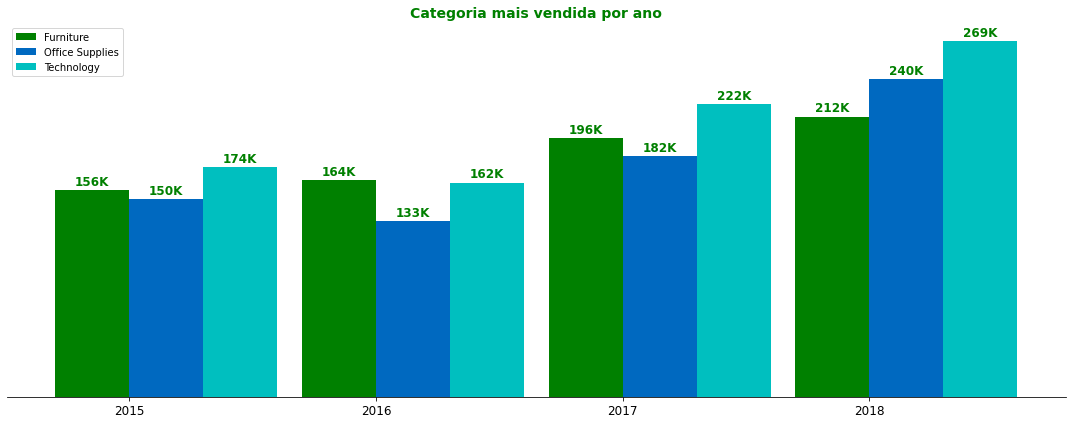

In [60]:
x5 = ano[ano["Category"]=="Furniture"]["Ano"].values
y5 = ano[ano["Category"]=="Furniture"]["Sales"].values
x6 = ano[ano["Category"]=="Office Supplies"]["Ano"].values
y6 = ano[ano["Category"]=="Office Supplies"]["Sales"].values
x7 = ano[ano["Category"]=="Technology"]["Ano"].values
y7 = ano[ano["Category"]=="Technology"]["Sales"].values



fig, ax = plt.subplots(figsize=[15,6])

wid = 0.3

ax.bar(x5-wid/2
       ,y5,color="g",
      width=wid # Afina a largura das colunas 
       ,label="Furniture"
      )
ax.bar(x6+wid/2
       ,y6,color="#0069c0",
      width=wid # Afina a largura das colunas
       ,label="Office Supplies"
      )
ax.bar(x7+wid+wid/2
       ,y7,color="c",
      width=wid # Afina a largura das colunas   
       ,label="Technology"
      )

for i in range(0,4):
    ax.annotate("{:,.0f}K".format(y5[i]/1000).replace(",","."),
               (x5[i]-wid/2,y5[i]),
                ha="center",
                xytext=(0,5),
                textcoords="offset points",
                fontsize=12,
                color="g",
                fontweight="bold"
               )
for i in range(0,4):
    ax.annotate("{:,.0f}K".format(y6[i]/1000).replace(",","."),
               (x6[i]+wid/2,y6[i]),
                ha="center",
                xytext=(0,5),
                textcoords="offset points",
                fontsize=12,
                color="g",
                fontweight="bold"
               )
for i in range(0,4):
    ax.annotate("{:,.0f}K".format(y7[i]/1000).replace(",","."),
               (x7[i]+wid+wid/2,y7[i]),
                ha="center",
                xytext=(0,5),
                textcoords="offset points",
                fontsize=12,
                color="g",
                fontweight="bold"
               )
    
#ax.set_yticks([0,380000]) # Ajusta o eixo y para para parar de cortar   
ax.yaxis.set_visible(False) # Tirar o eixo y da visualização    
ax.spines["top"].set_visible(False) #Titando a linha de grade de cima
ax.spines["left"].set_visible(False) #Titando a linha de grade Direita
ax.spines["right"].set_visible(False)#Titando a linha de grade da esquerda   
plt.title("Categoria mais vendida por ano",fontsize=14,fontweight="bold",color="g")    

plt.legend()

ax.xaxis.set_ticks([2015,2016,2017,2018])# Colocando os meses
ax.tick_params(axis="x",labelsize=12) # Melhorando o visual do eixo  x

plt.tight_layout()
plt.savefig("Venda Mes",transparent=True)